In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import lec5_graphs as gfx

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [4]:
df = pd.read_csv('earnings.csv').drop('Unnamed: 0',axis=1)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
attr_mat = df.drop(['earn'],axis=1)

In [8]:
X_mat_train = attr_mat[:-30]
X_mat_test = attr_mat[-30:]
y_train = df['earn'][:-30]
y_test = df['earn'][-30:]

In [11]:
X_mat_train.shape

(1344, 12)

In [12]:
modelo_sklearn = LinearRegression().fit(X_mat_train,y_train)

In [13]:
modelo_sklearn.coef_

array([   16.65006939,   135.46647227, -6029.31228857,  -749.4246293 ,
        2285.85393581,  2729.51444336,   -33.23454676,   335.26730493,
          33.23454676,  2215.35776999,    39.36492231,  6029.31228857])

In [14]:
attr_mat.columns

Index(['height1', 'height2', 'sex', 'race', 'hisp', 'ed', 'yearbn', 'height',
       'age', 'age_category', 'eth', 'male'],
      dtype='object')

In [15]:
modelo_sklearn.intercept_

-39642.581649516185

In [16]:
earn_yhat = modelo_sklearn.predict(X_mat_test)

In [17]:
earn_yhat

array([26511.73480161, 29319.47906573, 23974.62377808,  5461.1796184 ,
       15985.79575976, 22977.51018177, 18475.33784415, 27209.5700335 ,
       25721.83159156, 40449.2596724 , 15625.03116587, 26637.97715915,
       15569.38512397, 42983.40165038, 24283.30932393, 24379.19649299,
       20999.99488436, 13071.09448075, 20433.10508368, -5401.27840521,
       28178.80473294, 27564.76155343, 46239.21871922, 45513.50881321,
       24650.52298965, 22442.96832539, 31145.8839531 ,  8493.2975025 ,
       28269.5348291 , 22036.04262737])

In [22]:
mse_modelo = mean_squared_error(y_test,earn_yhat).round(1)
r2_modelo = r2_score(y_test, earn_yhat).round(2)

In [23]:
mse_modelo,r2_modelo

(458564220.2, 0.19)

In [25]:
#feature engineering, revisar las correlaciones

In [31]:
columns = df.columns

attr_name , pearson_r , abs_pearson_r  = [], [], []

for col in columns:
    if col != 'earn':
        attr_name.append(col)
        pearson_r.append(df[col].corr(df['earn']))
        abs_pearson_r.append(abs(df[col].corr(df['earn'])))

features = pd.DataFrame({
    'attribute': attr_name,
    'corr': pearson_r,
    'abs_corr': abs_pearson_r
})

feature = features.set_index('attribute')
features.sort_values(by=['abs_corr'],ascending=False)

,attribute,corr,abs_corr
2,sex,-0.352354,0.352354
11,male,0.352354,0.352354
5,ed,0.349334,0.349334
7,height,0.302707,0.302707
0,height1,0.188762,0.188762
1,height2,0.105633,0.105633
9,age_category,0.075321,0.075321
6,yearbn,-0.068475,0.068475
8,age,0.068475,0.068475
4,hisp,0.055187,0.055187


In [29]:
def get_corrs_ml(df, attr):
    '''
    Obtiene la correlacion en base al vector objetivo
    '''
    columns = df.columns

    attr_name , pearson_r , abs_pearson_r  = [], [], []

    for col in columns:
        if col != attr:
            attr_name.append(col)
            pearson_r.append(df[col].corr(df[attr]))
            abs_pearson_r.append(abs(df[col].corr(df[attr])))

    features = pd.DataFrame({
        'attribute': attr_name,
        'corr': pearson_r,
        'abs_corr': abs_pearson_r
    })

    feature = features.set_index('attribute')
    return features.sort_values(by=['abs_corr'],ascending=False)

In [30]:
get_corrs_ml(df,'earn')

,attribute,corr,abs_corr
2,sex,-0.352354,0.352354
11,male,0.352354,0.352354
5,ed,0.349334,0.349334
7,height,0.302707,0.302707
0,height1,0.188762,0.188762
1,height2,0.105633,0.105633
9,age_category,0.075321,0.075321
6,yearbn,-0.068475,0.068475
8,age,0.068475,0.068475
4,hisp,0.055187,0.055187


In [32]:
y_vec = df['earn']
X_mat = df.loc[:, ['sex','male','ed','height']]

In [33]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test , y_train, y_test = train_test_split(X_mat, y_vec,test_size=.33, random_state = 11238)

In [36]:
purge_model = LinearRegression().fit(X_train,y_train)

In [37]:
purge_yhat = purge_model.predict(X_test)
purge_model_mse = mean_squared_error(y_test,purge_yhat).round(2)
purge_model_r2 = r2_score(y_test,purge_yhat).round(2)

In [38]:
purge_model_mse,purge_model_r2

(260123631.72, 0.17)

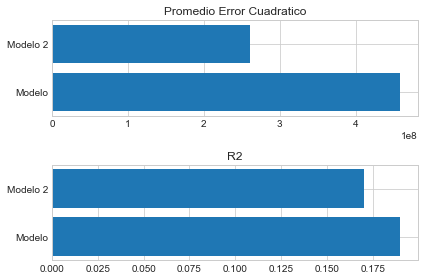

In [41]:
labels = ['Modelo','Modelo 2']
plt.subplot(2,1,1)
plt.barh(labels, [mse_modelo, purge_model_mse])
plt.title('Promedio Error Cuadratico')
plt.subplot(2,1,2)
plt.barh(labels, [r2_modelo, purge_model_r2])
plt.title('R2')
plt.tight_layout()

In [42]:
# minimizar error cuadratico, buscamos error cuadratico promedio sea 0
# en r2, buscamos maximar la variabilidad de mi modelo explica el modelo,  buscamos que sea cercano a 1